# 1) Background

### Outline of Algorithm: 

The paper I have chosen describes a type of finite mixture algorithm, one for modeling patterns of an outcome of interest as clusters across time. The method is termed by the authors as Group-based Latent Trajectory Modeling, and was developed by Daniel Nagin in 1999.

The general specification for the group based latent trajectory models is provided in equations (1) and (2). Equation (1) describes the basic form of the finite mixture model--i.e., summing a finite number of latent groupings believed to compose the underlying population. Since group membership is not observed, the proportion of the $j$ underlying population belonging to each of the latent trajectory groups $\pi_j$, must be estimated. This requires the aggregation of the $J$ conditional likelihood functions, forming the unconditional probability of the data, $Y_i$ (Nagin 2005).


$$P(Y_i) = \sum_{j}^J \pi_j P^j (Y_i)\tag{1}$$ 

Here, $P(Y_i)$ estimates the unconditional probability of seeing the trajectory of the outcome measure for individual $i$. 

The key to the "group-based" approach is an underlying idea called "conditional independence." The likelihood function this produces is denoted in equation (2). For a give group $j$, conditional independence makes the assumption that the distribution of $y_{it}$ is independent of the observed value of the outcome in prior periods, $y_{it-1}$,  $y_{it-2}$,... This assumption helps to reduce the complexity of the model, and when combined with the EM algorithm, allows for identification of latent trajectory groupingsdespite the complex nature of the model and data.

$$L = \prod^N P(Y_i)\tag{2}$$



## Readme for Python Module: 

### Group-Based Finite Mixture Models: A Latent Trajectory Approach 

**Code for course project use only at this time.**

Final project for STA 663 
* Takes time variable and continuous outcome 
* Generates latent trajectories (time-dependent clusters) of outcome behavior over time 

**Dependencies**

Required

* Python (created using 2.7.x)
* Numpy
* Scipy 
* Pymix (https://github.com/klahnakoski/pymix.git)

Recommended

* ggplot (for trajectory plotting function included in the repository)
* pandas (for trajectory plotting function included in the repository)
* STAN (for Bayesian alternative specification)
* pystan (for Bayesian alternative specification)

## 2) Implementation

*Note: I had started to build these distribution functions myself 
(see py scripts in GitHub repo)
but then I discovered a python library with mixture distributions
that could be combined and reshaped to estimate these models ('Pymix' package)!*

In [5]:
from __future__ import division
import os
import sys
import glob
from mixture import *
import mixture
import numpy as np
import pandas as pd
from ggplot import *
import pandas as pd
%matplotlib inline
%precision 4

# ------- #
# Normal Mixture #
# ------- #
# Normal Distribution Functions 

# Generate Means of Normal Mixture
def norm_means(data): 
    cols = data.shape[1]
    return np.repeat(0.0,cols) 

# Generate Covariance Structure of Normal Mixture based on conditional independence assumption
# (See Equation (2) in outline of algorithm)
def norm_cov(data):
    m = data.shape[1]
    covs = np.repeat(1.0,m) 
    return np.diag(covs)

# Single Multivariate Normal distribution function
def norm_singdist(ng, data):
    m = data.shape[1]
    dist = mixture.MultiNormalDistribution(m, 
        norm_means(data),norm_cov(data))
    return dist

# Generalize to multiple clusters of multivariate distribution function
def norm_multdist(ng, data):
    temp = list()
    for x in range(ng):
        temp.append(norm_singdist(2, data))
    return temp

# Data functions
def build_mix_dat(data):
    mixdat = mixture.DataSet()
    mixdat.fromArray(data)
    return mixdat

# Normal Mixture Model 
def intialize_normal_model(ng, data):
    mod_ps = np.repeat(1.0/ng, ng)
    if ng ==2:
        n1,n2 = norm_multdist(ng, data)
        mix_ = mixture.MixtureModel(ng, mod_ps,[n1,n2])
    elif ng == 3:  
        n1,n2,n3 = norm_multdist(ng, data)
        mix_ = mixture.MixtureModel(ng, mod_ps,[n1,n2,n3])
    elif ng == 4:  
        n1,n2,n3,n4 = norm_multdist(ng, data)
        mix_ = mixture.MixtureModel(ng, mod_ps,[n1,n2,n3,n4])
    elif ng == 5:  
        n1,n2,n3,n4,n5 = norm_multdist(ng, data)
        mix_ = mixture.MixtureModel(ng, mod_ps,[n1,n2,n3,n4,n5])
    elif ng == 6:  
        n1,n2,n3,n4,n5,n6 = norm_multdist(ng, data)
        mix_ = mixture.MixtureModel(ng, mod_ps,[n1,n2,n3,n4,n5,n6])
    elif ng == 7:  
        n1,n2,n3,n4,n5,n6,n7 = norm_multdist(ng, data)
        mix_ = mixture.MixtureModel(ng, mod_ps,[n1,n2,n3,n4,n5,n6,n7])
    elif ng == 8:  
        n1,n2,n3,n4,n5,n6,n7,n8 = norm_multdist(ng, data)
        mix_ = mixture.MixtureModel(ng, mod_ps,[n1,n2,n3,n4,n5,n6,n7,n8])
    return mix_ 

# Run Normal Mixture Model
def normal_mixmod(ng, data, s=0):
    mix_mod = intialize_normal_model(ng, data)
    mix_dat = build_mix_dat(data)
    mix_mod.modelInitialization(mix_dat)
    mix_mod.EM(mix_dat, 40,.2, silent=s)
    mix_mod.classify(mix_dat, silent=s)
    return mix_mod
   
# Results 
def GBFMM(ng,data, s=0): 
    out = normal_mixmod(ng, data, s=s)
    traj = list()
    for i in range(ng):
        traj.append(out.components[i].distList[0].mu)
    return traj

# Trajectory Plotting Function
def plot_traj(outs):
    if len(outs) == 2:
        d = {'one' : outs[0], 
        'two' : outs[1], 
        'Time': range(1,len(outs[0])+1)}
    elif len(outs) == 3:
        d = {'one' : outs[0], 
        'two' : outs[1], 
        'three' : outs[2], 
        'Time': range(1,len(outs[0])+1)}
    elif len(outs) == 4: 
        d = {'one' : outs[0], 
        'two' : outs[1], 
        'three' : outs[2], 
        'four' : outs[3], 
        'Time': range(1,len(outs[0])+1)}
    elif len(outs) == 5:
        d = {'one' : outs[0], 
        'two' : outs[1], 
        'three' : outs[2], 
        'four' : outs[3], 
        'five' : outs[4], 
        'Time': range(1,len(outs[0])+1)}
    elif len(outs) == 6:
        d = {'one' : outs[0], 
        'two' : outs[1], 
        'three' : outs[2], 
        'four' : outs[3], 
        'five' : outs[4], 
        'six' : outs[5], 
        'Time': range(1,len(outs[0])+1)}
    elif len(outs) == 7: 
        d = {'one' : outs[0],
        'two' : outs[1], 
        'three' : outs[2], 
        'four' : outs[3], 
        'five' : outs[4], 
        'six' : outs[5], 
        'seven' : outs[6], 
        'Time': range(1,len(outs[0])+1)}
    elif len(outs) == 8:
        d = {'one' : outs[0],
        'two' : outs[1], 
        'three' : outs[2], 
        'four' : outs[3], 
        'five' : outs[4], 
        'six' : outs[5], 
        'seven' : outs[6], 
        'eight' : outs[7], 
        'Time': range(1,len(outs[0])+1)}
    dat = pd.DataFrame(d) 
    dm = pd.melt(dat, id_vars=['Time'], var_name='Latent Class', value_name='Value') 
    print ggplot(dm, aes('Time', 'Value', color='Latent Class')) + \
        geom_point(size=80) + \
        geom_line(size=3) + \
        theme_bw()

## 3) Testing

In [25]:
# ----------- #
# Tests for convergence given mixture distributions with given number of groupings
# (these also test that the number of latent groups produced equal the number of groups specified)
# test_numgroups_3
# ----------- #
dist3 = MultiNormalDistribution(3, [0.0, 1.0, 3.0], 
                    [[1.0, 0.1, 0.14], 
                     [0.2, 1.0, 0.2], 
                     [0.3, 0.2, 1.0]])
data3 = dist3.sampleSet(100)
assert len(GBFMM(ng=3, data=data3, s=1)) == 3
 
# test_numgroups_4
dist4 = MultiNormalDistribution(4, [0.0, 1.0, 3.0,2.0], 
                    [[1.0, 0.1, 0.14,0.2], 
                     [0.2, 1.0, 0.2,0.4], 
                     [0.3, 0.2, 1.0,0.3], 
                     [0.3, 0.2, 0.3,1.0]])
data4 = dist4.sampleSet(100)
assert len(GBFMM(ng=4, data=data4, s=1)) == 4

# test_numgroups_5
dist5 = MultiNormalDistribution(5, [0.0, 1.0, 3.0,2.0,0.5], 
                    [[1.0, 0.1, 0.14,0.2,0.1], 
                     [0.2, 1.0, 0.2,0.4,0.35], 
                     [0.3, 0.2, 1.0,0.3,0.05], 
                     [0.3, 0.2, 0.3,1.0,0.32], 
                     [0.1, 0.22,0.08,.15,1.0]])
data5 = dist5.sampleSet(100)
assert len(GBFMM(ng=5, data=data5, s=1)) == 5

# test_numgroups_6
dist6 = MultiNormalDistribution(6, [0.0, 1.0, 3.0,2.0,0.5,1.5], 
                    [[1.0, 0.1, 0.14,0.2, 0.1, 0.6], 
                     [0.2, 1.0, 0.2, 0.4, 0.35,0.2], 
                     [0.3, 0.2, 1.0, 0.3, 0.05,0.0], 
                     [0.3, 0.2, 0.3, 1.0, 0.32,0.1], 
                     [0.1, 0.22,0.08,0.15,1.0, 0.25],
                     [0.2, 0.1, 0.2, 0.4, 0.35,1.0]])
data6 = dist6.sampleSet(1000)
assert len(GBFMM(ng=6, data=data6, s=1)) == 6

# test_numgroups_7
dist7 = MultiNormalDistribution(7, [0.0, 1.0, 3.0,2.0,0.5,1.5,-1.0], 
                    [[1.0, 0.1, 0.14,0.2, 0.1, 0.6,0.25], 
                     [0.2, 1.0, 0.2, 0.4, 0.35,0.2, 0.2], 
                     [0.3, 0.2, 1.0, 0.3, 0.05,0.0, 0.3], 
                     [0.3, 0.2, 0.3, 1.0, 0.32,0.1, 0.2], 
                     [0.1, 0.22,0.08,0.15,1.0, 0.25,0.1],
                     [0.2, 0.1, 0.2, 0.4, 0.35,1.0, 0.0], 
                     [0.1, 0.22,0.08,0.15,0.2, 0.15,1.0]])
data7 = dist7.sampleSet(1000)
assert len(GBFMM(ng=7, data=data7, s=1)) == 7

# test_numgroups_8
dist8 = MultiNormalDistribution(8, [0.0, 1.0, 3.0,2.0,0.5,1.5,-1.0,1.0], 
                    [[1.0, 0.1, 0.14,0.2, 0.1, 0.6,0.25,0.2], 
                     [0.2, 1.0, 0.2, 0.4, 0.35,0.2, 0.2,0.1], 
                     [0.3, 0.2, 1.0, 0.3, 0.05,0.0, 0.3,0.2], 
                     [0.3, 0.2, 0.3, 1.0, 0.32,0.1, 0.2,0.35], 
                     [0.1, 0.22,0.08,0.15,1.0, 0.25,0.1,0.05],
                     [0.2, 0.1, 0.2, 0.4, 0.35,1.0, 0.0,0.1], 
                     [0.1, 0.22,0.08,0.15,0.2, 0.15,1.0,0.3], 
                     [0.15, 0.2, 0.1, 0.2, 0.2,0.35,0.0,1.0]])
data8 = dist8.sampleSet(1000)
assert len(GBFMM(ng=8, data=data8, s=1)) == 8

# ----------- #
# Tests for convergence for small N 
# ----------- #
dist_small_1 = MultiNormalDistribution(3, [0.0, 1.0, 3.0], 
                    [[1.0, 0.1, 0.14], 
                     [0.2, 1.0, 0.2], 
                     [0.3, 0.2, 1.0]])
data_small_1 = dist_small_1.sampleSet(30)
assert len(GBFMM(ng=3, data=data_small_1, s=1)) == 3

dist_small_2 = MultiNormalDistribution(4, [0.0, 1.0, 3.0,2.0], 
                    [[1.0, 0.1, 0.14,0.2], 
                     [0.2, 1.0, 0.2,0.4], 
                     [0.3, 0.2, 1.0,0.3], 
                     [0.3, 0.2, 0.3,1.0]])
data_small_2 = dist_small_2.sampleSet(50)
assert len(GBFMM(ng=4, data=data_small_2, s=1)) == 4

# ----------- #
# Tests for convergence for large N 
# ----------- #
dist_large_1 = MultiNormalDistribution(3, [0.0, 1.0, 3.0], 
                    [[1.0, 0.1, 0.14], 
                     [0.2, 1.0, 0.2], 
                     [0.3, 0.2, 1.0]])
data_large_1 = dist_large_1.sampleSet(2000)
assert len(GBFMM(ng=3, data=data_large_1, s=1)) == 3

dist_large_2 = MultiNormalDistribution(4, [0.0, 1.0, 3.0,2.0], 
                    [[1.0, 0.1, 0.14,0.2], 
                     [0.2, 1.0, 0.5,0.4], 
                     [0.3, 0.2, 1.0,0.3], 
                     [0.0, 0.4, 0.2,1.0]])
data_large_2 = dist_large_2.sampleSet(3000)
assert len(GBFMM(ng=4, data=data_large_2, s=1)) == 4

Step 1: log likelihood: -3312.4960746   (diff=-3311.4960746)
Step 2: log likelihood: -3298.60641088   (diff=13.8896637209)
Step 3: log likelihood: -3263.23596942   (diff=35.3704414607)
Step 4: log likelihood: -3187.20997306   (diff=76.0259963601)
Step 5: log likelihood: -3094.92279202   (diff=92.2871810369)
Step 6: log likelihood: -3027.36520871   (diff=67.5575833093)
Step 7: log likelihood: -2996.13875147   (diff=31.2264572371)
Step 8: log likelihood: -2980.69605671   (diff=15.4426947604)
Step 9: log likelihood: -2969.45658442   (diff=11.2394722896)
Step 10: log likelihood: -2958.9513708   (diff=10.505213623)
Step 11: log likelihood: -2949.23252172   (diff=9.718849085)
Step 12: log likelihood: -2941.73097139   (diff=7.50155032951)
Step 13: log likelihood: -2937.35778592   (diff=4.37318547048)
Step 14: log likelihood: -2935.01655564   (diff=2.34123027403)
Step 15: log likelihood: -2933.56541109   (diff=1.45114455759)
Step 16: log likelihood: -2932.50329834   (diff=1.06211274104)
Step 1

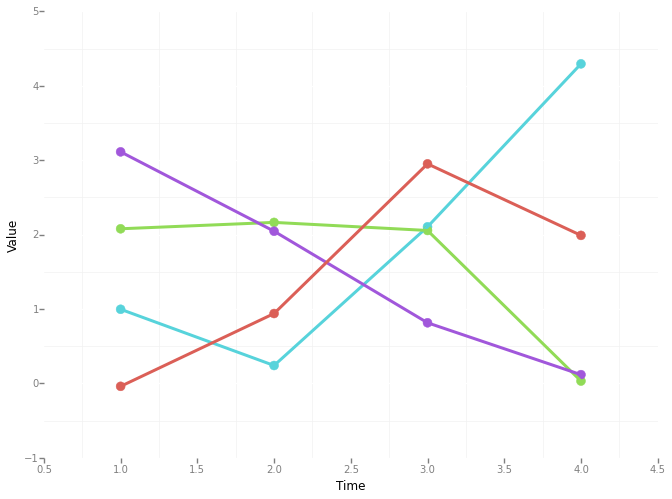

<ggplot: (303148237)>


In [69]:
# ----------- #
# Test Trajectory Plotting Function & Visual Check of Trajectories
# ----------- #
d1 = MultiNormalDistribution(4, [0.0, 1.0, 3.0,2.0], 
                    [[1.0, 0.1, 0.14,0.2], 
                     [0.8, 1.0, 0.2,0.4], 
                     [0.5, 0.2, 1.0,0.3], 
                     [0.1, 0.3, 0.3,1.0]])

d2 = MultiNormalDistribution(4, [1.0,0.2, 2.0,4.5], 
                    [[1.0, 0.3, 0.5,0.0], 
                     [0.5, 1.0, 0.2, 0.5], 
                     [0.3, 0.4, 1.0, 0.5],
                    [0.3, 0.4, 0.1, 1.0]])

d3 = MultiNormalDistribution(4, [3.0,2.0, 1.0,0.0], 
                    [[1.0, 0.3, 0.5,0.0], 
                     [0.5, 1.0, 0.2, 0.5], 
                     [0.3, 0.4, 1.0, 0.5],
                    [0.3, 0.4, 0.1, 1.0]])
    
data1 = d1.sampleSet(300)
data2 = d2.sampleSet(100)
data3 = d3.sampleSet(100)

# print np.array(data1)
data3= np.concatenate([data1, data2, data3], axis=0)
outs_1 = GBFMM(ng=4, data=data3, s=0)
plot_traj(outs_1)

## 4) Application and comparison